### <center>Jatin Kayasth</center>
### <center>Jiuge Ren</center>

In [467]:
import numpy as np
import pandas as pd
import json, requests
import html5lib
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Part I: Working with HTML and JSON

In [468]:
#reading html data from github

data_html = pd.read_html("https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/Data/Math_books.html")
data_html = data_html[0]
data_html

,Title,Auther,University,Edition,Year
0,Statstics,"David Freedman, Robert Pisani, Roger Purves",NaN,Fourth,2018
1,Linear Algebra and its Apllications,Gilbert Strang,Massachusetts Institute of Technology,Fourth,2021
2,Mathematical Optimization and Economic Theory,Michael D. Intriligator,University of California,Eastern Economic,2013


In [469]:
#reading json file
data_json = pd.read_json("https://raw.githubusercontent.com/Jatin6004/Data-Acquisition/main/Data/book.json")
data_json.head()

,Title,Author,University,Edition,Year
0,Statstics,"David Freedman, Robert Pisani, Roger Purves",,Fourth,2018
1,Linear Algebra and its Apllications,Gilbert Strang,Massachusetts Institute of Technology,Fourth,2021
2,Mathematical Optimization and Economic Theory,Michael D. Intriligator,University of California,Eastern Economic,2013


*Observation : Both the dataframes are indentical, except for the blank values. In case of html file it shows NaN but in case of json files, it shows it as an empty string.*

### Part II: Scraping the Katz School’s “Staff” Web Page

In [470]:
#downloading the page
page = requests.get('https://www.yu.edu/katz/staff')
print(page.text)


<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
  <head>
    <!-- Google Tag Manager -->
    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
            j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
            'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
        })(window,document,'script','dataLayer','GTM-PSVTTKK');</script>
    <!-- End Google Tag Manager -->
    <!-- Start People Grove Cards -->
    <script src="https://cdn.peoplegrove.com/pg-widgets/p

In [471]:
#Parsing page with BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [472]:
#getting data from div with class_='text-only'
staff = ""
for div in soup.find_all('div', class_='text-only'):
    staff += div.text
print(staff)


Office of the Dean 
Paul Russo, Vice Provost and Dean 
Read Dr. Russo's full biography 
Aaron Ross, Director of Strategic Initiatives and Deputy to the Dean 
aaron.ross2@yu.edu | 646-592-4148  
 
Sofia Binioris, Senior Project Manager and Advisor to the Dean 
sofia.binioris@yu.edu  
Jackie Hamilton, Director of Global Engagement and New Business Development
jackie.hamilton@yu.edu I 646-787-6194
Tabitha Collazo, Business and Operations Coordinator
tabitha.collazo@yu.edu | 646-592-4735
Graduate Admissions
Jared Hakimi, Director
jared.hakimi@yu.edu | 646-592-4722 | Schedule an Appointment
Shayna Matzner, Assistant Director
shayna.matzner@yu.edu I 646-592-4726 I Schedule an Appointment
Xavier Velasquez, Assistant Director
xavier.velasquez@yu.edu | 646-592-4737 | Schedule an Appointment
Graduate Student Life
Rafael Reyes, Director of Graduate Student Life and Community Engagement
rafael.reyes@yu.edu I 646-592-4729
Academic Programs
Shari Lowsky, Academic Program Manager, STEM
shari.lowsky@

In [473]:
#creating the dataframe
staff_info = pd.DataFrame(columns = ["Office", "Name", "Title", "Email", "Phone"])
staff_info

,Office,Name,Title,Email,Phone


In [474]:
#Getting the offices
string = str(staff).replace("\xa0","")
office_list = re.findall(r"[\n][\w ]+[\n]",string)
office_list

['\nOffice of the Dean\n',
 '\nGraduate Admissions\n',
 '\nGraduate Student Life\n',
 '\nAcademic Programs\n',
 '\nTeaching and Learning\n']

In [475]:
#spliting staff based on the offices
info = re.split(r"[\n][\w ]+[\n]",string)[1:]

#adding "\n" string in the beginning of each element in info list making it easier to extract other data
for i in range(0,len(info)):
    info[i] = "\n" + info[i]
info

["\nPaul Russo, Vice Provost and Dean\nRead Dr. Russo's full biography\nAaron Ross, Director of Strategic Initiatives and Deputy to the Dean\naaron.ross2@yu.edu |646-592-4148 \n\nSofia Binioris, Senior Project Manager and Advisor to the Dean\nsofia.binioris@yu.edu \nJackie Hamilton, Director of Global Engagement and New Business Development\njackie.hamilton@yu.edu I 646-787-6194\nTabitha Collazo, Business and Operations Coordinator\ntabitha.collazo@yu.edu | 646-592-4735",
 '\nJared Hakimi, Director\njared.hakimi@yu.edu|646-592-4722 | Schedule an Appointment\nShayna Matzner, Assistant Director\nshayna.matzner@yu.eduI646-592-4726 ISchedule an Appointment\nXavier Velasquez, Assistant Director\nxavier.velasquez@yu.edu | 646-592-4737 | Schedule an Appointment',
 '\nRafael Reyes, Director of Graduate Student Life and Community Engagement\nrafael.reyes@yu.edu I 646-592-4729',
 '\nShari Lowsky, Academic Program Manager, STEM\nshari.lowsky@yu.edu I646-592-4311\nSimon Jaffe, Academic Program Coo

In [476]:
#creating info lists
office = []
name = []
title = []
email = []
phone = []

for ele in range(0,len(info)):
    
    phone_number= []
    email_ids = []
    titles = []
    #spliting each row in info list by the name regex to get the title,phone,email-ids
    temp = re.split(r"[\n][\w]+ [\w-]+,",info[ele])
    for i in range(1,len(temp)):
        phone_number.append(re.findall(r"[0-9]{3}\-[0-9]{3}\-[0-9]{4}",temp[i]))
        email_ids.append(re.findall(r"[a-z.0-9-]+@yu.edu",temp[i]))
        titles.append(temp[i].split("\n")[0])
        
    #getting the name from each element in the info list   
    for i in re.findall(r"[\n][\w]+ [\w-]+,",info[ele]):
        name.append(str(i).replace(",","").replace("\n",""))
        #appending the same office for each of the name in the same row of info list
        office.append(office_list[ele].replace("\n",""))
        
    #replacing empty string with "N/A" 
    for i in phone_number:
        if len(i) < 1:
            phone.append("N/A")
        else:
            phone.append(i[-1])
    for i in titles:
        if len(i) < 1:
            title.append("N/A")
        else:
            title.append(i)
    for i in email_ids:
        if len(i) < 1:
            email.append("N/A")
        else:
            email.append(i[-1])
    
    

In [477]:
#populating the dataframe created earlier
staff_info["Office"] = office
staff_info["Name"] = name
staff_info["Title"] = title
staff_info["Email"] = email
staff_info["Phone"] = phone

In [478]:
#final Dataframe
staff_info

,Office,Name,Title,Email,Phone
0,Office of the Dean,Paul Russo,Vice Provost and Dean,N/A,N/A
1,Office of the Dean,Aaron Ross,Director of Strategic Initiatives and Deputy ...,aaron.ross2@yu.edu,646-592-4148
2,Office of the Dean,Sofia Binioris,Senior Project Manager and Advisor to the Dean,sofia.binioris@yu.edu,N/A
3,Office of the Dean,Jackie Hamilton,Director of Global Engagement and New Busines...,jackie.hamilton@yu.edu,646-787-6194
4,Office of the Dean,Tabitha Collazo,Business and Operations Coordinator,tabitha.collazo@yu.edu,646-592-4735
5,Graduate Admissions,Jared Hakimi,Director,jared.hakimi@yu.edu,646-592-4722
6,Graduate Admissions,Shayna Matzner,Assistant Director,shayna.matzner@yu.edu,646-592-4726
7,Graduate Admissions,Xavier Velasquez,Assistant Director,xavier.velasquez@yu.edu,646-592-4737
8,Graduate Student Life,Rafael Reyes,Director of Graduate Student Life and Communi...,rafael.reyes@yu.edu,646-592-4729
9,Academic Programs,Shari Lowsky,"Academic Program Manager, STEM",shari.lowsky@yu.edu,646-592-4311


### Part III: Working with Web API’s

In [479]:
#Get movie reviews with string "godfather" in the title
result=requests.get('https://api.nytimes.com/svc/movies/v2/reviews/search.json?query=godfather&api-key=670EZISc71A5P8hE1AslcqUiAqGeAeAc')
movies=result.json()
movies

{'status': 'OK',
 'copyright': 'Copyright (c) 2022 The New York Times Company. All Rights Reserved.',
 'has_more': False,
 'num_results': 10,
 'results': [{'display_title': 'The Black Godfather',
   'mpaa_rating': 'TV-MA',
   'critics_pick': 0,
   'byline': 'BEN KENIGSBERG',
   'headline': '‘The Black Godfather’ Review: The Music Executive Who Made It All Happen',
   'summary_short': 'Reginald Hudlin’s documentary about Clarence Avant includes many golden anecdotes.',
   'publication_date': '2019-06-06',
   'opening_date': '2019-06-07',
   'date_updated': '2019-06-14 16:44:01',
   'link': {'type': 'article',
    'url': 'https://www.nytimes.com/2019/06/06/movies/the-black-godfather-review.html',
    'suggested_link_text': 'Read the New York Times Review of The Black Godfather'},
   'multimedia': {'type': 'mediumThreeByTwo210',
    'src': 'https://static01.nyt.com/images/2019/06/05/arts/blackgodfather1/blackgodfather1-mediumThreeByTwo210.jpg',
    'height': 140,
    'width': 210}},
  {'d

In [480]:
data = pd.DataFrame(movies["results"])
data.head()

,display_title,mpaa_rating,critics_pick,byline,headline,summary_short,publication_date,opening_date,date_updated,link,multimedia
0,The Black Godfather,TV-MA,0,BEN KENIGSBERG,‘The Black Godfather’ Review: The Music Execut...,Reginald Hudlin’s documentary about Clarence A...,2019-06-06,2019-06-07,2019-06-14 16:44:01,"{'type': 'article', 'url': 'https://www.nytime...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
1,Square Grouper: The Godfathers of Ganja,R,0,RACHEL SALTZ,Adventures in the Drug Trades,“Square Grouper” is a documentary about pot sm...,2011-04-14,2011-04-15,2017-11-02 04:18:13,"{'type': 'article', 'url': 'https://www.nytime...",None
2,Tokyo Godfathers,PG-13,1,A. O. Scott,Three Down-and-Outs Rescue a Foundling From th...,"Another marvel from Satoshi Kon, whose first t...",2004-01-16,None,2017-11-02 04:16:23,"{'type': 'article', 'url': 'https://www.nytime...",None
3,"The Godfather, Part III",R,1,Janet Maslin,GODFATHER PART III (MOVIE),Mafia heir trapped by legacy of past. Coppola'...,1990-12-25,1990-12-25,2017-11-02 04:17:42,"{'type': 'article', 'url': 'https://www.nytime...",None
4,"The Godfather, Part II",R,1,VINCENT CANBY,"Godfather: Part II, The (Movie)",,1974-12-13,1974-12-20,2017-11-02 04:17:27,"{'type': 'article', 'url': 'https://www.nytime...",None


In [481]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   display_title     10 non-null     object
 1   mpaa_rating       10 non-null     object
 2   critics_pick      10 non-null     int64 
 3   byline            10 non-null     object
 4   headline          10 non-null     object
 5   summary_short     10 non-null     object
 6   publication_date  10 non-null     object
 7   opening_date      8 non-null      object
 8   date_updated      10 non-null     object
 9   link              10 non-null     object
 10  multimedia        1 non-null      object
dtypes: int64(1), object(10)
memory usage: 1008.0+ bytes


In [482]:
#checking mpaa_rating column
data["mpaa_rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'Passed', ''], dtype=object)

In [483]:
data["mpaa_rating"].value_counts()

R         5
Passed    2
TV-MA     1
PG-13     1
          1
Name: mpaa_rating, dtype: int64

In [484]:
#replacing the empty string in mpaa_rating with "other"
data["mpaa_rating"] = data["mpaa_rating"].replace("","other")

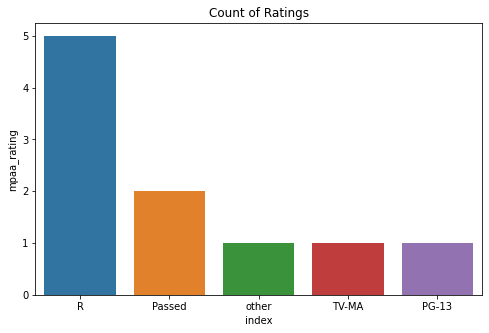

In [494]:
#plotting mpaa_rating column
df = pd.DataFrame(data["mpaa_rating"].value_counts()).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(df["index"],df["mpaa_rating"])
plt.title("Count of Ratings")
plt.show()

*From the above graph it can be seen that the highest number of ratings for a movies with godfather in the title is "TV-MA".*

In [486]:
data["byline"].value_counts()

Janet Maslin       1
Harry T. Smith     1
J.T.M.             1
BOSLEY CROWTHER    1
VINCENT CANBY      1
A. O. Scott        1
Vincent Canby      1
BEN KENIGSBERG     1
NORA SAYRE         1
RACHEL SALTZ       1
Name: byline, dtype: int64

In [487]:
data["critics_pick"].value_counts()

0    6
1    4
Name: critics_pick, dtype: int64

*This shows the movies picked by the critics , out of the 10 movies having godfatherin the title, 4 are selected by the critics.*